# The Iris Dataset

The Iris dataset includes information about three iris species known as Setosa, Versicolor and Virginica. There are 50 instances of each iris species (150 in total). Each instance includes some information about the shape of the flower including **sepal length**, **sepal width**, **petal length** and **petal width**. As a result, our dataset includes 150 instances/input ($X_1$, $X_2$, ..., $X_{150}$) that have 4 features ($X_i \in R ^4$) and each input is associated with a label Y = {$Y_1$, $Y_1$, ... ,$Y_{150}$}, where $Y_i \in \{Setosa, Versicolor, Virginica\}$. 

You can download the Iris dataset from Studium - Assignment 3.

We want to define a neural network as our model and then train it with the given data. The well trained model will be capable of predecting the class/species of a new given flower based on its sepal length, sepal width, petal length and petal width.

# Libraries that we use
We use pytorch library in python to design our model (neural network), train it and test it. We also use scikit-learn library for data preprocessing.

First we import all the libraries that we will need in this asssignment:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data

We read the Iris dataset and put it in a pandas dataframe. The *iris_data.head()* command shows the dataset's attributes:

In [3]:
iris_data = pd.read_csv('Iris.csv')

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Drop *id*

You can see that the data frame includes an attribute called **id** that has to be removed from the data frame as it does not have any role in our training.

In [4]:
iris_data.drop(['Id'],axis=1,inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Encoding The Attributes of The Target Column

We encode the values in Y into integer as it make it easier for us in the future to work with pytorch tensors.


In [5]:
iris_data['Species'] = iris_data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

## Separate X, Y into different dataframes

As you saw, inputs (X) and outcomes (Y) are in the same data frame. We put them into separate X and Y.


In [6]:
X = iris_data.drop(["Species"],axis=1).values
Y = iris_data["Species"].values

## Standardization

Standardization of a dataset is a common requirement for many machine learning estimators. Because they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Therefore we standardize them:

The standard value of a feature (lets call it $feature_i$) is calculated as:

$z_i = (feature_i - u_i) / s_i$

where $u_i$ is the mean of $feature_i$ over all samples, and $s_i$ is the standard deviation of $feature_i$ over all samples.



In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split the data set into training and testing

After the model is trained we have to test it with the data points that did not have any contribution in the training process. Therefore, we extract 20% of our data points (20% of 150 is 30) and keep them to test the model after it has been trained with the 80% of the data (80% of 150 is 120).

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state=5)

## Converting training and testing data to torch tensors

Pytorch keeps and manipulates data in a data format that is called tensors. We have to convert our data into pytorch tensors:

In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

## Define our neural network architecture

Now it is the time to define our neural network architecture. The model consists of input with size 4 (as X has 4 features), two hidden layers each consists of 50 neurons and 3 outputs as we have 3 classes. Neurons' activation functions in both hidden layers are defined *relu*. 

As our task is classification, the output layer has to be a logistic regression on the last hidden layer of the network (check slides no. 27 and 39). Logistic function is called softmax if the number of classes is haigher than two. Softmax is the generalization of logistic regression. 

In [10]:
class ourNeuralNetworkModel1(nn.Module):
    def __init__(self, input_dim):
        super(ourNeuralNetworkModel1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

## Define optimizer and loss function

In the classroom we discussed that we can not find the optimum values of parameters with a closed-form formula (like what we had for OLS regression model in slide 7). Therefore we have to use the gradient descent algorithm to estimate the optimum values for parameters. In pytorch we can define our optimizer easily. Here, we use the Adam optimizer which is an extension to stochastic gradient descent. Please pay attention that we have set our learning rate to 0.001 (check slides no 8 and 9). 

We discussed in the classroom that the most common loss function for classification is cross entropy (check slide no. 6). In pytorch we can easily define our loss function with a command. 

In [11]:
model     = ourNeuralNetworkModel1(input_dim = 4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

## Dummy input

In slide no. 21 we showed that we add a new feature to our input data with value equal to 1 to model the bias in our neural network. But you could see that this dummy variable is not defined as a part of our neural network architecture above. 

Do not worry. We did not add the dummy feature in X because pytorch will do it for us by default. 
Lets check the model:

In [12]:
model

ourNeuralNetworkModel1(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

You could see that it is written *bias = True*. This means that pytorch is adding the dummy variable to the input data by default. 

## Train the model

The following function trains the model by using the training data. You do not need to learn this function in this course. It is enough to know that this function will train you model (sets optimum values to the parameters):

In [13]:
def train_network(model, optimizer, loss_fn, X_train, Y_train, X_test, Y_test, num_epochs, train_losses, test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = loss_fn(output_train, Y_train)


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = loss_fn(output_test,Y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

In [14]:
num_epochs = 2000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [15]:
train_network(model,optimizer,loss_fn,X_train,Y_train,X_test,Y_test,num_epochs,train_losses,test_losses)

## Loss is decreasing

The following figure shows that the train loss decreases as the optimizer (ADAM) finds better values for our parameters (neurons' weights).

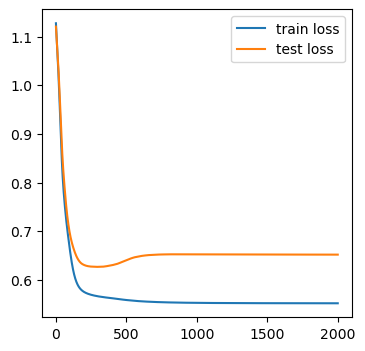

In [16]:
plt.figure(figsize=(4,4))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

## Testing the model

You can remember that we splitted the input data, X, into the train and test data sets. Our model has been trained by using the training data. Now it is the time to use the test data set to evaluate our trained model:

In [17]:
predictions_test =  []
with torch.no_grad():
    predictions_test = model(X_test)
    predictions_train = model(X_train)

In [18]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [331]:
test_acc = get_accuracy_multiclass(predictions_test,Y_test)
train_acc = get_accuracy_multiclass(predictions_train,Y_train)

print(f"Test Accuracy: {round(test_acc*100,3)}")
print(f"Train Accuracy: {round(train_acc*100,3)}")

Test Accuracy: 90.0
Train Accuracy: 100.0


# -----------------------------------------------------------------------------------------------------

# Regularization with Dropout

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
iris_data = pd.read_csv('Iris.csv')
iris_data.drop(['Id'],axis=1,inplace=True)
iris_data['Species'] = iris_data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

X = iris_data.drop(["Species"],axis=1).values
Y = iris_data["Species"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data into training, testing sets

In [22]:
# train = 0.6, test = 0.2, valid = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2,random_state=5)


X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [23]:
class ourNeuralNetworkModel_dropout(nn.Module):
    def __init__(self, input_dim):
        super(ourNeuralNetworkModel_dropout, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.do1 = nn.Dropout(0.3)
        self.layer2 = nn.Linear(50, 50)
        self.do2 = nn.Dropout(0.3)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.do1(x)
        x = F.relu(self.layer2(x))
        x = self.do2(x)
        x = F.softmax(self.layer3(x), dim=1)
        return x
    

In [24]:
model     = ourNeuralNetworkModel_dropout(input_dim = 4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn   = nn.CrossEntropyLoss()

In [25]:
def train_network_dropout(model, optimizer, loss_fn, X_train, Y_train, X_test, Y_test, num_epochs, train_losses, test_losses):
    for epoch in range(num_epochs):
        model.train() # in training mode (= some neurons can be off)
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = loss_fn(output_train, Y_train)


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()
        
        
        model.eval()            # in evaluation modes (all neurons would be on to calculate test loss)
        with torch.no_grad():
            output_test = model(X_test)
            loss_test = loss_fn(output_test,Y_test)
            train_losses[epoch] = loss_train.item()
            test_losses[epoch] = loss_test.item()

In [26]:
num_epochs = 2000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)


train_network_dropout(model,optimizer,loss_fn,X_train,Y_train,X_test,Y_test,num_epochs,train_losses,test_losses)

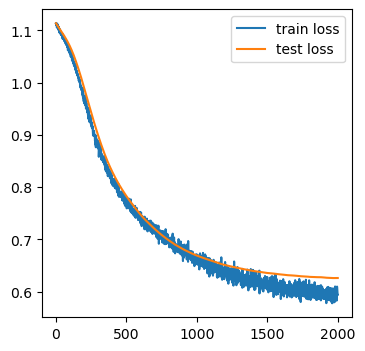

In [27]:
plt.figure(figsize=(4,4))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [28]:
predictions_test =  []
with torch.no_grad():
    predictions_test = model(X_test)
    predictions_train = model(X_train)

In [29]:
test_acc = get_accuracy_multiclass(predictions_test,Y_test)
train_acc = get_accuracy_multiclass(predictions_train,Y_train)

print(f"Test Accuracy: {round(test_acc*100,3)}")
print(f"Train Accuracy: {round(train_acc*100,3)}")

Test Accuracy: 93.333
Train Accuracy: 98.333


### Dropout is a regularization technique used in neural networks to prevent overfitting. Overfitting occurs when a model learns to perform extremely well on the training data but fails to generalize to unseen data (e.g., the test set). Dropout helps mitigate this issue by introducing randomness during training, which forces the network to learn more robust and generalizable features.

## How Dropout Works:

### 1. Random Deactivation:

During training, dropout randomly deactivates (sets to zero) a fraction of neurons in a layer with a probability p (e.g., p = 0.5 means 50% of neurons are deactivated).

This deactivation happens independently for each training example and each forward pass.

### 2. Scaling:

During training, the outputs of the remaining active neurons are scaled up by 1 / (1 - p) to compensate for the deactivated neurons. This ensures that the expected sum of the outputs remains the same.

### 3. Evaluation Mode:

During evaluation (testing), dropout is disabled, and all neurons are active. This ensures that the full network is used for making predictions.

## Why Use Dropout?

### Prevents Overfitting:

By randomly deactivating neurons, dropout prevents the network from relying too heavily on specific neurons or features. This encourages the network to learn more robust and generalizable patterns.

### Improves Generalization:

Dropout acts as a form of regularization, similar to L2 regularization or weight decay. It helps the model generalize better to unseen data by reducing its sensitivity to specific training examples.

### Ensemble Effect:

Dropout can be seen as training a large ensemble of smaller networks (since different neurons are deactivated in each forward pass). During evaluation, the full network can be viewed as an average of these smaller networks, which often leads to better performance.

### Reduces Co-adaptation:

Neurons in a neural network can become overly dependent on each other (co-adaptation). Dropout breaks these dependencies by forcing neurons to work independently, leading to a more robust model.

## When to Use Dropout:

### Deep Networks:

Dropout is particularly useful in deep neural networks with many layers, as these networks are more prone to overfitting.

### Large Datasets:

Dropout is less critical when working with very large datasets, as the risk of overfitting is lower. However, it can still be beneficial in many cases.

### High Variance Models:

If your model has high variance (i.e., it performs well on the training set but poorly on the test set), dropout can help reduce this variance.

## Dropout in Practice:

### Placement:

Dropout is typically applied after fully connected layers (nn.Linear) or convolutional layers (nn.Conv2d).

### Probability:

The dropout probability p is a hyperparameter. Common values are 0.2, 0.3, or 0.5. A higher value means more neurons are deactivated, increasing regularization but potentially reducing model capacity.

### Evaluation Mode:

Always ensure that dropout is disabled during evaluation by calling model.eval() in PyTorch. This ensures that all neurons are active for making predictions.



## <span style="color: red;">Problem Description specific to battery dataset:</span>

You are building a machine learning model to classify the State of Charge (SoC) of electric vehicle (EV) batteries into predefined categories based on various features related to the battery and charging process. The goal is to predict the SoC range (e.g., low, medium, high) to optimize battery management, improve charging efficiency, and ensure safe operation.

## Key Components of the Problem:
### 1. Input Features:
The model uses a set of features related to the battery and charging process, such as:

Voltage (V): Voltage during charging.

Current (A): Current during charging.

Battery Temperature (°C): Temperature of the battery.

Ambient Temperature (°C): Ambient temperature.

Charging Duration (min): Duration of charging.

Degradation Rate (%): Rate of battery degradation.

Charging Mode: Mode of charging (e.g., Fast, Slow, Normal).

Efficiency (%): Charging efficiency.

Battery Type: Type of battery (e.g., Li-ion, LiFePO4).

Charging Cycles: Number of charging cycles.

EV Model: Model of the electric vehicle.

### 2. Target Variable:
The target variable is the State of Charge (SoC) Class, which is derived from the SoC (%) values. The SoC is divided into 4 classes:

Class 0: SoC < 20% (Low)

Class 1: 20% ≤ SoC < 50% (Medium-Low)

Class 2: 50% ≤ SoC < 80% (Medium-High)

Class 3: SoC ≥ 80% (High)



### 4. Machine Learning Task:

This is a multi-class classification problem because the target variable (SoC Class) has 4 discrete categories (0, 1, 2, 3).

The model will learn to map the input features to one of these 4 classes.



Class 0: SOC < 20%

Class 1: 20% ≤ SOC < 50%

Class 2: 50% ≤ SOC < 80%

Class 3: SOC ≥ 80%

This will transform the problem into a multi-class classification task where the target variable is the SOC class (0, 1, 2, 3).

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [46]:
# Load the dataset
data = pd.read_csv('ev_battery_charging_data.csv')

In [47]:
# Create SOC classes
bins = [0, 20, 50, 80, 100]  # Define the bin edges
labels = [0, 1, 2, 3]  # Define the class labels
data['SOC Class'] = pd.cut(data['SOC (%)'], bins=bins, labels=labels, include_lowest=True)

# Drop the original SOC column
data = data.drop(columns=['SOC (%)'])

# Preprocessing
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
data['Charging Mode'] = label_encoder.fit_transform(data['Charging Mode'])
data['Battery Type'] = label_encoder.fit_transform(data['Battery Type'])
data['EV Model'] = label_encoder.fit_transform(data['EV Model'])

# Features and target
X = data.drop(columns=['SOC Class', 'Optimal Charging Duration Class']).values
y = data['SOC Class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [53]:
# Define the MLP model with Dropout
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)  # Add dropout layer
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)  # Apply dropout
        out = self.fc2(out)  # Output raw logits (no activation here)
        return out

Epoch [1/200], Train Loss: 1.4471, Test Loss: 1.3866, Accuracy: 0.3100, F1 Score: 0.2221
Epoch [2/200], Train Loss: 1.3422, Test Loss: 1.3502, Accuracy: 0.3300, F1 Score: 0.2904
Epoch [3/200], Train Loss: 1.3088, Test Loss: 1.3332, Accuracy: 0.3200, F1 Score: 0.2824
Epoch [4/200], Train Loss: 1.2826, Test Loss: 1.3153, Accuracy: 0.3400, F1 Score: 0.3090
Epoch [5/200], Train Loss: 1.2721, Test Loss: 1.3006, Accuracy: 0.3600, F1 Score: 0.3248
Epoch [6/200], Train Loss: 1.2498, Test Loss: 1.2877, Accuracy: 0.3900, F1 Score: 0.3507
Epoch [7/200], Train Loss: 1.2431, Test Loss: 1.2717, Accuracy: 0.4250, F1 Score: 0.3817
Epoch [8/200], Train Loss: 1.2112, Test Loss: 1.2596, Accuracy: 0.4300, F1 Score: 0.3848
Epoch [9/200], Train Loss: 1.1868, Test Loss: 1.2390, Accuracy: 0.4350, F1 Score: 0.3910
Epoch [10/200], Train Loss: 1.1612, Test Loss: 1.2191, Accuracy: 0.4300, F1 Score: 0.3818
Epoch [11/200], Train Loss: 1.1569, Test Loss: 1.1946, Accuracy: 0.4450, F1 Score: 0.3937
Epoch [12/200], Tra

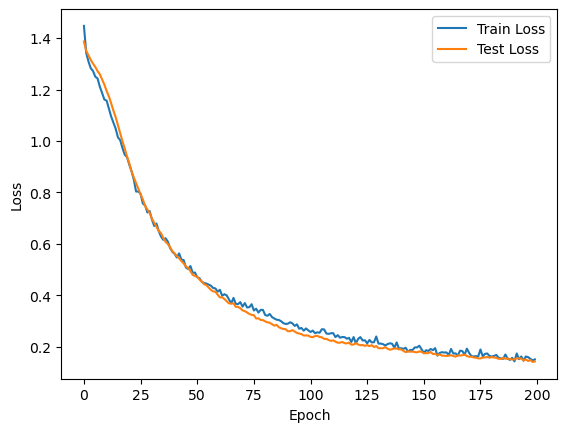

In [54]:
# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(np.unique(y))  # Number of SOC classes (4)
learning_rate = 0.001
num_epochs = 200

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss includes LogSoftmax
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and evaluation
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)  # Get the predicted class
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    
    test_loss = running_loss / len(test_loader)
    test_losses.append(test_loss)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')


plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Explanation of Results:

### 1. Accuracy: The percentage of correctly classified SOC classes.

### 2. F1 Score: A weighted average of precision and recall, useful for imbalanced datasets.

### 3. Loss: The training and test loss per epoch, which should decrease over time if the model is learning.

### <span style="color: green;">Using Cross validation</span>

Fold [1/5]
Epoch [1/100], Train Loss: 1.4252, Test Loss: 1.3428, Accuracy: 0.3600, F1 Score: 0.2432
Epoch [2/100], Train Loss: 1.3394, Test Loss: 1.3119, Accuracy: 0.3500, F1 Score: 0.2976
Epoch [3/100], Train Loss: 1.3059, Test Loss: 1.2977, Accuracy: 0.3400, F1 Score: 0.3060
Epoch [4/100], Train Loss: 1.2773, Test Loss: 1.2843, Accuracy: 0.3450, F1 Score: 0.3097
Epoch [5/100], Train Loss: 1.2541, Test Loss: 1.2710, Accuracy: 0.3700, F1 Score: 0.3325
Epoch [6/100], Train Loss: 1.2282, Test Loss: 1.2571, Accuracy: 0.4000, F1 Score: 0.3647
Epoch [7/100], Train Loss: 1.2135, Test Loss: 1.2395, Accuracy: 0.4000, F1 Score: 0.3628
Epoch [8/100], Train Loss: 1.1999, Test Loss: 1.2177, Accuracy: 0.4100, F1 Score: 0.3691
Epoch [9/100], Train Loss: 1.1660, Test Loss: 1.1920, Accuracy: 0.4450, F1 Score: 0.3978
Epoch [10/100], Train Loss: 1.1472, Test Loss: 1.1692, Accuracy: 0.4850, F1 Score: 0.4317
Epoch [11/100], Train Loss: 1.1186, Test Loss: 1.1439, Accuracy: 0.5300, F1 Score: 0.4791
Epoch [1

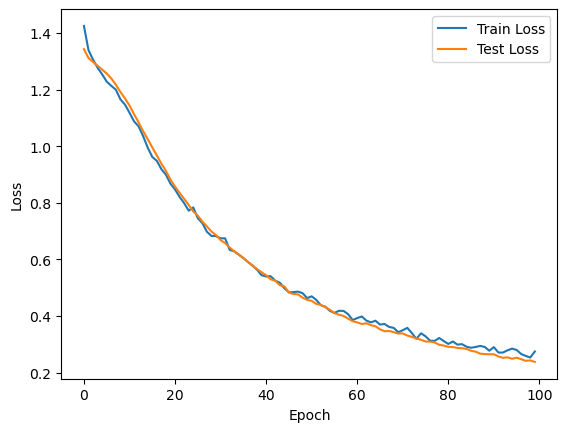

Classification Report for Fold 1:
              precision    recall  f1-score   support

     Class 0       1.00      0.86      0.93        29
     Class 1       0.94      1.00      0.97        66
     Class 2       1.00      0.96      0.98        67
     Class 3       0.93      1.00      0.96        38

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200

Confusion matrix : [[25  4  0  0]
 [ 0 66  0  0]
 [ 0  0 64  3]
 [ 0  0  0 38]]
Fold [2/5]
Epoch [1/100], Train Loss: 1.3874, Test Loss: 1.3365, Accuracy: 0.3000, F1 Score: 0.2446
Epoch [2/100], Train Loss: 1.3307, Test Loss: 1.3116, Accuracy: 0.3300, F1 Score: 0.2678
Epoch [3/100], Train Loss: 1.3091, Test Loss: 1.2923, Accuracy: 0.3150, F1 Score: 0.2571
Epoch [4/100], Train Loss: 1.2929, Test Loss: 1.2754, Accuracy: 0.3450, F1 Score: 0.2805
Epoch [5/100], Train Loss: 1.2622, Test Loss: 1.2604, Accuracy: 0.3700, F1 Score: 0.

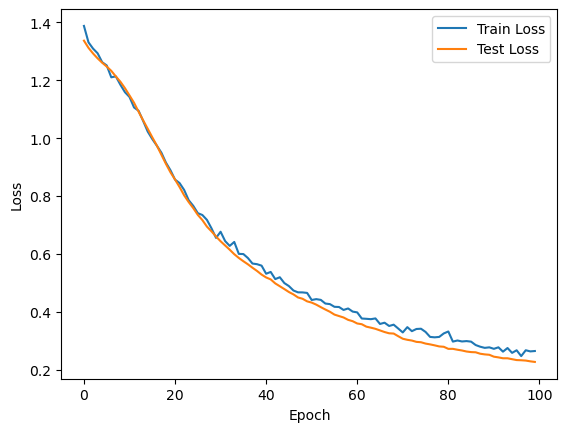

Classification Report for Fold 2:
              precision    recall  f1-score   support

     Class 0       0.86      0.75      0.80        24
     Class 1       0.90      0.96      0.93        69
     Class 2       1.00      0.95      0.98        65
     Class 3       0.95      1.00      0.98        42

    accuracy                           0.94       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.94      0.94      0.94       200

Confusion matrix : [[18  6  0  0]
 [ 3 66  0  0]
 [ 0  1 62  2]
 [ 0  0  0 42]]
Fold [3/5]
Epoch [1/100], Train Loss: 1.3726, Test Loss: 1.3197, Accuracy: 0.3750, F1 Score: 0.3336
Epoch [2/100], Train Loss: 1.3125, Test Loss: 1.2785, Accuracy: 0.4150, F1 Score: 0.3501
Epoch [3/100], Train Loss: 1.2741, Test Loss: 1.2538, Accuracy: 0.4200, F1 Score: 0.3559
Epoch [4/100], Train Loss: 1.2475, Test Loss: 1.2357, Accuracy: 0.4200, F1 Score: 0.3565
Epoch [5/100], Train Loss: 1.2297, Test Loss: 1.2152, Accuracy: 0.4350, F1 Score: 0.

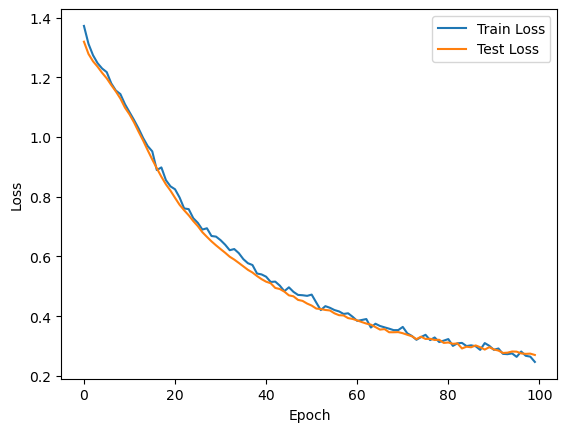

Classification Report for Fold 3:
              precision    recall  f1-score   support

     Class 0       0.89      0.81      0.85        21
     Class 1       0.90      0.96      0.93        67
     Class 2       0.98      0.92      0.95        65
     Class 3       0.96      1.00      0.98        47

    accuracy                           0.94       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.94      0.94      0.94       200

Confusion matrix : [[17  4  0  0]
 [ 2 64  1  0]
 [ 0  3 60  2]
 [ 0  0  0 47]]
Fold [4/5]
Epoch [1/100], Train Loss: 1.3834, Test Loss: 1.3381, Accuracy: 0.3900, F1 Score: 0.3278
Epoch [2/100], Train Loss: 1.3196, Test Loss: 1.3034, Accuracy: 0.3650, F1 Score: 0.3014
Epoch [3/100], Train Loss: 1.2952, Test Loss: 1.2819, Accuracy: 0.3700, F1 Score: 0.3138
Epoch [4/100], Train Loss: 1.2662, Test Loss: 1.2614, Accuracy: 0.4100, F1 Score: 0.3457
Epoch [5/100], Train Loss: 1.2601, Test Loss: 1.2453, Accuracy: 0.4250, F1 Score: 0.

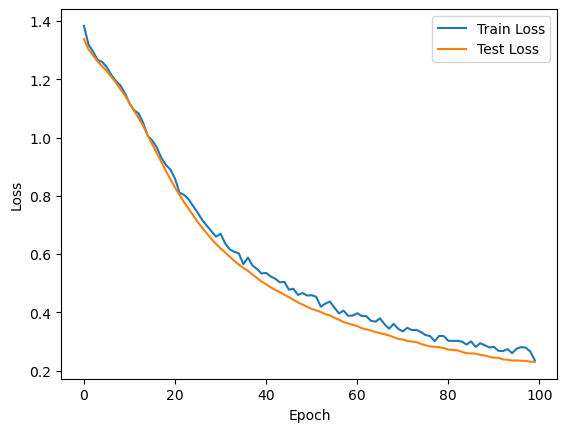

Classification Report for Fold 4:
              precision    recall  f1-score   support

     Class 0       1.00      0.68      0.81        22
     Class 1       0.89      1.00      0.94        66
     Class 2       0.96      0.99      0.97        68
     Class 3       1.00      0.93      0.96        44

    accuracy                           0.94       200
   macro avg       0.96      0.90      0.92       200
weighted avg       0.95      0.94      0.94       200

Confusion matrix : [[15  7  0  0]
 [ 0 66  0  0]
 [ 0  1 67  0]
 [ 0  0  3 41]]
Fold [5/5]
Epoch [1/100], Train Loss: 1.3863, Test Loss: 1.3196, Accuracy: 0.3750, F1 Score: 0.3399
Epoch [2/100], Train Loss: 1.3460, Test Loss: 1.2850, Accuracy: 0.3950, F1 Score: 0.3313
Epoch [3/100], Train Loss: 1.2732, Test Loss: 1.2692, Accuracy: 0.4200, F1 Score: 0.3467
Epoch [4/100], Train Loss: 1.2629, Test Loss: 1.2557, Accuracy: 0.4150, F1 Score: 0.3427
Epoch [5/100], Train Loss: 1.2453, Test Loss: 1.2415, Accuracy: 0.4200, F1 Score: 0.

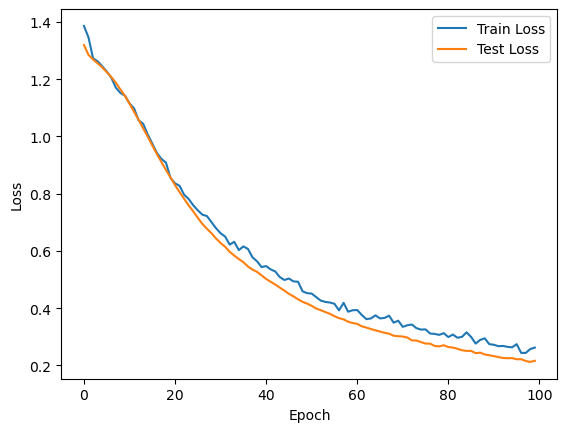

Classification Report for Fold 5:
              precision    recall  f1-score   support

     Class 0       0.86      0.78      0.82        23
     Class 1       0.93      0.94      0.94        71
     Class 2       0.97      1.00      0.98        60
     Class 3       1.00      0.98      0.99        46

    accuracy                           0.95       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.95      0.95      0.95       200

Confusion matrix : [[18  5  0  0]
 [ 3 67  1  0]
 [ 0  0 60  0]
 [ 0  0  1 45]]
Average Accuracy: 0.9480
Average F1 Score: 0.9471


In [59]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


# Hyperparameters
input_size = X.shape[1]
hidden_size = 64
output_size = len(np.unique(y))  # Number of SOC classes (4)
learning_rate = 0.001
num_epochs = 100  # Increased epochs for early stopping
dropout_prob = 0.5  # Dropout probability
patience = 5  # Early stopping patience

# K-Fold Cross Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store results
results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    print(f'Fold [{fold+1}/{k_folds}]')
    
    # Split data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Create DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize the model, loss function, and optimizer
    model = MLP(input_size, hidden_size, output_size, dropout_prob)
    criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss includes LogSoftmax
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Early stopping variables
    best_test_loss = float('inf')
    epochs_without_improvement = 0
    
    # Training and evaluation
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        
        model.eval()
        running_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)  # Get the predicted class
                all_preds.extend(preds.numpy())
                all_labels.extend(labels.numpy())
        
        test_loss = running_loss / len(test_loader)
        test_losses.append(test_loss)
        
        # Calculate accuracy and F1 score
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted')
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')


        # Early stopping
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Classification Report
    print(f'Classification Report for Fold {fold+1}:')
    print(classification_report(all_labels, all_preds, target_names=[f'Class {i}' for i in range(output_size)]))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    print(f"Confusion matrix : {conf_matrix}")
    #plt.figure(figsize=(8, 6))
    #sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    #plt.xlabel('Predicted')
    #plt.ylabel('True')
    #plt.title(f'Confusion Matrix for Fold {fold+1}')
    #plt.show()
    
    # Store results
    results.append({
        'fold': fold+1,
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    })

# Print average results
avg_accuracy = np.mean([result['accuracy'] for result in results])
avg_f1_score = np.mean([result['f1_score'] for result in results])
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average F1 Score: {avg_f1_score:.4f}')